In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import statsmodels.api as sm
import datetime

In [39]:
# Load the data
data = pd.read_csv("D:/Kifya/week1/Data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")  # Replace "your_data.csv" with your actual file path

            ##Descriptive_Statistics

In [40]:
# Handle missing values (adjust as needed)
data.dropna(subset=['headline'], inplace=True)  # Remove rows with missing headlines

In [41]:
# Descriptive Statistics
headline_lengths = data['headline'].str.len()
print("Headline Length Statistics:")
print(headline_lengths.describe())

Headline Length Statistics:
count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64


                ###Text Analysis(Sentiment Analysis & Topic Modeling)

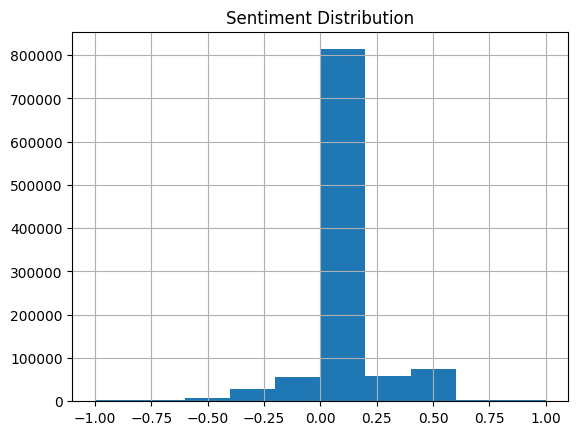

In [42]:
# Sentiment Analysis
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_distribution = data['sentiment'].hist()
plt.title('Sentiment Distribution')
plt.show()


Dataset Mean Sentiment: 0.05004633734037076
Difference from Baseline: 0.05004633734037076


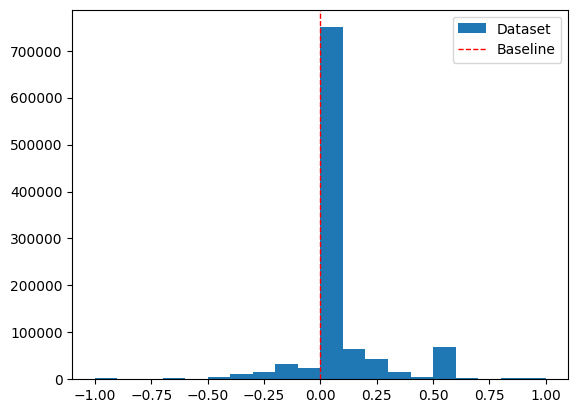

In [43]:
# compare the dataset sentiment distribution using various methods:
baseline_mean = 0  # Neutral sentiment baseline

dataset_mean = data['sentiment'].mean()

print("Dataset Mean Sentiment:", dataset_mean)
print("Difference from Baseline:", dataset_mean - baseline_mean)

# Visualize distributions (optional)
plt.hist(data['sentiment'], bins=20, label='Dataset')
plt.axvline(baseline_mean, color='red', linestyle='dashed', linewidth=1, label='Baseline')
plt.legend()
plt.show()

In [49]:
# Assuming 'data' is your DataFrame with 'date' and 'sentiment' columns
data['date'] = pd.to_datetime(data['date'], format='mixed')


C:\Users\eep\AppData\Local\Temp\ipykernel_352\3495162386.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['date'] = pd.to_datetime(data['date'], format='mixed')


#####Time Series Analysis

In [31]:
# Time Series Analysis
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

daily_counts = data.resample('D').size()
print("Daily Publication Frequency:")
print(daily_counts)

ValueError: time data "2020-06-09 10:52:15-04:00" doesn't match format "%m/%d/%Y %H:%M", at position 485. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

                ###Publisher ANalysis

In [32]:
# Publisher Analysis
publisher_counts = data['publisher'].value_counts()
print("Publisher Counts:")
print(publisher_counts)

# Extract email domains (if applicable)
data['publisher_domain'] = data['publisher'].str.extract(r'(\w+@\w+\.\w+)')
domain_counts = data['publisher_domain'].value_counts()
print("Publisher Domain Counts:")
print(domain_counts)

Publisher Counts:
publisher
Paul Quintaro        168435
Lisa Levin           139785
Benzinga Newsdesk    111281
Charles Gross         72892
Monica Gerson         61374
                      ...  
Growth Aces               1
Stock Market Newz         1
Monetarex                 1
Junnan Guo                1
GeoInvesting              1
Name: count, Length: 984, dtype: int64
Publisher Domain Counts:
publisher_domain
luke@benzinga.com                         3877
vishwanath@benzinga.com                   1397
kenwell@benzinga.com                       689
proactive@gmail.com                         86
richa28dhand@gmail.com                       9
Andy@andyswan.com                            4
shivdeep@benzinga.com                        3
aefimoff@benzinga.com                        3
benzingastaffwriter3@benzinga.com            3
andrew@tothetick.com                         2
andrewbeghou@benzinga.com                    2
kiana@investdiva.com                         2
adam@eosdetroit.io 